# Project 1 - Reinforcement Learning - MO436

#### Group: 
* Arthur Guazzelli
* Elian Laura 
* Iury Cleveston 
* Maria Tejada

## 1) Environment Description

In this project, we use OpenAi Gym's FrozenLake $8\times8$ environment. This environment has a representation in an $8\times8$ grid, the objective is to cross the board to reach the objective without falling into the ice holes. Therefore, we have the following labels:

* S: Initial state.
* F: Frozen lake
* H: Ice hole
* G: Goal.

<br>
<div>
<center><img src="frozenLake.png" width="250"/></center>
<center>Figure 1 - Frozen Lake Grid.</center>
</div>

The current state is represented as a single number corresponding to the tile where the agent has entered, ranging from 0 to 63; therefore, this environment is discrete and partial observable. The possible actions are moving north, east, south, and west. Frozen Lake is presented in a deterministic and stochastic way; the difference is in the slippery ice, where the agent might slip and reach an unexpected state.

The ice holes are close to feasible paths to the goal; also, the reward is delayed until the end. These characteristics make Frozen Lake a challenging environment, especially in the stochastic version, where the dynamics are unpredictable.

Codes are available at https://github.com/thurbridi/mo436-project-1

In [1]:
import sys
sys.path.insert(0, '../src')

## 2) Monte Carlo Control (iury)

The Monte Carlo Agent was initialized with the state-action values $Q(s, a)$ equal to 0. We employed a step-size $\alpha_{t} = \frac{1}{N(s_{t},a_{t})}$, where $N(s_{t},a_{t})$ refers to the number of times action $a$ was selected from the state $s$.

The trade-off between exploration and exploitation was determined by an $\epsilon-greedy$ policy, where $\epsilon_{t} = \frac{N0}{N0+N(s_{t})}$; $N0$ is an hyperparameter, and $N(s_{t})$ is the number of times the state $s$ has been visited. 

In this project, we implemented two versions: tabular and linear approximation. Also, we searched for the best parameters using grid search, and we evaluated the solutions in the deterministic and stochastic environment.

The equation used for tabular Monte Carlo improvement is:

$Q(s,a) = Q(s,a) + \frac{1}{N(s,a)}(G_{t} - Q(s,a))$,

where $G_{t} = \sum \gamma^{T-1}R_{k,T}$, and $N(s,a) = N(s,a) + 1$

For policy evaluation, we used:

$\pi(s) = \mathrm{argmax} Q(s,a)$,

In [2]:
from monte_carlo_tabular import *
from monte_carlo_approximator import *

### 2.1) Tabular & Deterministic

The first experiment consisted in applying the Monte Carlo First Visit in the tabular and deterministic environment. Therefore, we used a grid search technique to find the best solution given the parameters defined as:

$\mathrm{N0} \in [0.1, 1, 10]$,

$\mathrm{gamma} \in [1, 0.9, 0.5, 0.1]$,

$\mathrm{episodes} \in [100, 1000]$


In [3]:
grid_search_tabular(stochastic=False)

      n0  gamma  episodes  win/loss (%)  elapsed time (s)
0    0.1    1.0     100.0         100.0          0.226304
1    1.0    1.0     100.0         100.0          0.189473
2   10.0    1.0     100.0           2.0          0.072398
3    0.1    0.9     100.0         100.0          0.126679
4    1.0    0.9     100.0         100.0          0.124684
5   10.0    0.9     100.0           2.0          0.089683
6    0.1    0.5     100.0         100.0          0.145805
7    1.0    0.5     100.0         100.0          0.095972
8   10.0    0.5     100.0           2.0          0.069440
9    0.1    0.1     100.0         100.0          0.108018
10   1.0    0.1     100.0         100.0          0.075810
11  10.0    0.1     100.0           2.0          0.064267
12   0.1    1.0    1000.0         100.0          0.421142
13   1.0    1.0    1000.0         100.0          0.392267
14  10.0    1.0    1000.0         100.0          1.148584
15   0.1    0.9    1000.0         100.0          0.294481
16   1.0    0.

In this experiment, we varied the $N0$, gamma, and episodes. The win/loss metric is defined as the percentage of wins from 100 games plays; the majority of executions returned 100\% of wins. Only the executions with $N0=10$ and with 100 episodes could not achieved maximum success, due to the excessive exploration. The elapsed time presented a consistent correlation with the number of episodes.

We selected the execution number 4 to be analyzed in detail as follows:

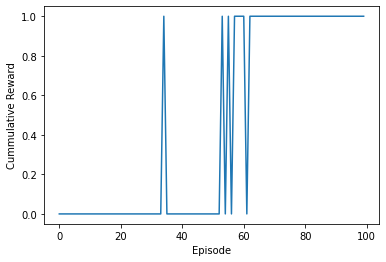

In [5]:
Q, env = train_tabular(stochastic=False, episodes=100, gamma=0.9, n0=1)

The cumulative discounted reward (G) by episode increased during training; the average variance has also decreased, which means the agent is learning a good policy. The exploration rate is initially set as $N0=1$; however, as the training continues, the states are being visited, and the agent started to select greedy actions, contributing to the cumulative reward's variance decrease in the end. 

The final board is shown below, where the agent was able to reach its goal:

In [13]:
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


We also reported the best state value ($V_*$) and the best policy ($\pi_*$), as follows:

In [14]:
print_state_values_tabular(Q)


		 State Value
------------------------------------------------
 0.11| 0.14| 0.00| 0.22| 0.26| 0.30| 0.00| 0.00|
------------------------------------------------
 0.00| 0.14| 0.17| 0.20| 0.09| 0.37| 0.41| 0.04|
------------------------------------------------
 0.00| 0.03| 0.03| 0.00| 0.24| 0.05| 0.49| 0.56|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.22| 0.60|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.18| 0.74|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.86|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 1.00|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00| 0.00|
------------------------------------------------


In [15]:
print_policy_tabular(Q)


		 Policy/Actions
------------------------------------------------
  r  |  s  |  r  |  r  |  r  |  s  |  l  |  s  |
------------------------------------------------
  r  |  r  |  r  |  n  |  s  |  r  |  s  |  r  |
------------------------------------------------
  s  |  r  |  n  |  l  |  r  |  r  |  r  |  s  |
------------------------------------------------
  n  |  s  |  r  |  l  |  l  |  n  |  s  |  s  |
------------------------------------------------
  n  |  r  |  s  |  l  |  r  |  r  |  r  |  s  |
------------------------------------------------
  s  |  n  |  r  |  l  |  n  |  l  |  s  |  s  |
------------------------------------------------
  r  |  l  |  n  |  s  |  n  |  r  |  l  |  s  |
------------------------------------------------
  l  |  s  |  s  |  r  |  s  |  l  |  l  |  n  |
------------------------------------------------


The policy is shown by state, where the greedy actions can be:
<ul>
    <li>n - north</li>
    <li>r - right</li>
    <li>s - south</li>
    <li>l - left</li>
</ul>

Observing the $V_*$ plot and the best policy $\pi_*$, we noted that the agent preferred to explore the top-right quadrant of the grid, mainly because the path seems less risky. In this sense, most of the actions are to go right and then south. The cumulative return (G) is appropriately assigned to the trajectory, being larger in the goal state, and decreasing its value until the initial state.

### 2.2) Tabular & Stochastic

The second experiment employed the same methodology as the first one. In this case, we turned on the environment slippery, which adds stochasticity. Similarly, we searched for the best solution using the grid search algorithm using the following parameters:

$\mathrm{N0} \in [1, 100, 1000, 10000]$,

$\mathrm{gamma} \in [1, 0.9, 0.1]$,

$\mathrm{episodes} \in [10000, 100000]$

This time we increased the number of episodes and the $N0$ constant to enable more exploration in the environment.

In [16]:
grid_search_tabular(stochastic=True)

         n0  gamma  episodes  win/loss (%)  elapsed time (s)
0       1.0    1.0   10000.0           7.0          5.432594
1     100.0    1.0   10000.0          28.0          7.623629
2    1000.0    1.0   10000.0          55.0          9.491570
3   10000.0    1.0   10000.0          36.0         12.016099
4       1.0    0.9   10000.0           1.0          5.742304
5     100.0    0.9   10000.0          12.0          8.934242
6    1000.0    0.9   10000.0          43.0          9.263228
7   10000.0    0.9   10000.0           2.0         10.051708
8       1.0    0.1   10000.0           4.0          7.212385
9     100.0    0.1   10000.0           0.0          8.766804
10   1000.0    0.1   10000.0           1.0         11.912093
11  10000.0    0.1   10000.0           2.0          9.833791
12      1.0    1.0  100000.0          13.0         63.864103
13    100.0    1.0  100000.0          26.0         96.923429
14   1000.0    1.0  100000.0          60.0        128.208909
15  10000.0    1.0  1000

However, when the environment is stochastic, the agent has enormous difficulties in learning a good policy. Half of the executions returned a success rate inferior to 10\%. Nevertheless, the other executions were promising, especially the numbers 14 and 2, with win rates of 60\% and 55\%, respectively. The elapsed time has dramatically increased, primarily due to the increase in the number of episodes. The best solution was achieved by providing intermediate exploration with $N0=1000$. Also, the discount factor significantly impacted the win rate; the best results were achieved using a rate greater than 0.9.

Now, we will analyze the solution number 2:

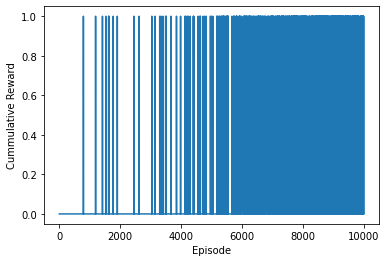

In [6]:
Q, env = train_tabular(stochastic=True, episodes=10000, gamma=1, n0=1000)

The cumulative discounted reward has a large variance due to the stochasticity. However, the agent can reach the goal state most of the time; as the training proceeds, the agent retrieves more rewards. Due to the unknown dynamics, the agent falls into the ice holes more frequently, even when selecting the appropriate action, as shown below:

In [10]:
env.render()

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Following our methodology, we plot the state value ($V_*$) and the derived policy $\pi_*$.

In [7]:
print_state_values_tabular(Q)


		 State Value
------------------------------------------------
 0.05| 0.06| 0.06| 0.08| 0.08| 0.10| 0.14| 0.12|
------------------------------------------------
 0.05| 0.07| 0.06| 0.07| 0.08| 0.10| 0.11| 0.13|
------------------------------------------------
 0.02| 0.01| 0.02| 0.00| 0.05| 0.06| 0.14| 0.14|
------------------------------------------------
 0.01| 0.01| 0.00| 0.00| 0.01| 0.00| 0.14| 0.17|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.01| 0.07| 0.15| 0.23|
------------------------------------------------
 0.01| 0.00| 0.00| 0.00| 0.00| 0.05| 0.00| 0.35|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.00| 0.04| 0.00| 0.59|
------------------------------------------------
 0.00| 0.00| 0.00| 0.00| 0.25| 0.25| 0.50| 0.00|
------------------------------------------------


In [8]:
print_policy_tabular(Q)


		 Policy/Actions
------------------------------------------------
  n  |  r  |  s  |  r  |  n  |  r  |  r  |  r  |
------------------------------------------------
  n  |  n  |  n  |  n  |  r  |  n  |  s  |  l  |
------------------------------------------------
  r  |  r  |  n  |  l  |  n  |  r  |  r  |  s  |
------------------------------------------------
  n  |  n  |  l  |  r  |  r  |  n  |  r  |  s  |
------------------------------------------------
  l  |  l  |  l  |  l  |  n  |  s  |  n  |  r  |
------------------------------------------------
  l  |  n  |  r  |  s  |  s  |  r  |  s  |  r  |
------------------------------------------------
  s  |  s  |  r  |  n  |  n  |  s  |  n  |  r  |
------------------------------------------------
  r  |  l  |  r  |  s  |  s  |  n  |  s  |  s  |
------------------------------------------------


The state value was properly determined; it increases as the agent approaches the goal state. However, a curious behavior has emerged; the agent attempts to stay close to the game's border most of the time. Also, the actions are chosen to exploit the stochastic dynamics of the environment, like going right instead of south. The policy makes the agent avoid the holes in the first place while expecting to reach the desired state through the game's stochasticity. Further, in the stochastic version, the agent has found alternative paths to the goal.

### 2.3) Linear Function Approximation & Deterministic

The third experiment consisted of applying a linear function approximator to avoid a complete state representation. In this sense, we aim to generalize to unseen states by using a linear combination of features, given as:

$w = w + \alpha_{t}[(G_{t} - x(S)^Tw)x(S)]$

$x(S) = [\mathrm{previous\_state}, \mathrm{current\_state}, \mathrm{mod\_state}, \mathrm{left\_state}]$

The feature vector is generated by extracting several features to represent the state, such as the previous and current state, as well as the state divided by their column number (8, considering the grid size), and the distance to the goal (64-current_state). We also tested with polynomial functions; however, it has not provided good results.

In [3]:
grid_search_approximator(stochastic=False)

     alpha  gamma  eps  episodes  win/loss (%)  elapsed time (s)
0   0.0100    1.0  0.9    1000.0           0.0          2.296066
1   0.0100    0.9  0.9    1000.0           0.0          2.193257
2   0.0100    0.1  0.9    1000.0           0.0          2.201234
3   0.0100    1.0  0.5    1000.0           0.0          4.716376
4   0.0100    0.9  0.5    1000.0           0.0          5.958995
5   0.0100    0.1  0.5    1000.0           0.0          5.927667
6   0.0100    1.0  0.1    1000.0           0.0         10.008311
7   0.0100    0.9  0.1    1000.0           0.0         20.709810
8   0.0100    0.1  0.1    1000.0           0.0         15.008419
9   0.0100    1.0  0.9    5000.0           0.0         23.582531
10  0.0100    0.9  0.9    5000.0           0.0         17.897397
11  0.0100    0.1  0.9    5000.0           0.0         15.203945
12  0.0100    1.0  0.5    5000.0           0.0         27.742179
13  0.0100    0.9  0.5    5000.0           0.0         32.884709
14  0.0100    0.1  0.5   

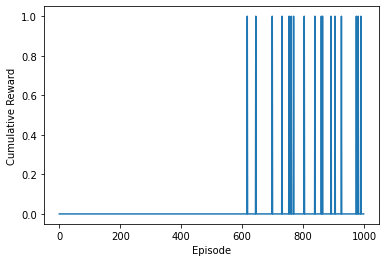

In [5]:
Q, env = train_approximator(stochastic=False, episodes=1000, gamma=0.9, alpha=0.001, eps=0.5)

In [8]:
play(env, Q)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FF

The Monte Carlo Control with Linear Function Approximation (LFA) was able to provide a reasonable policy. Observing the game play, we can state that the agent was able to reach the goal. In this sense, the LFA could generalize to unseen states.

### 2.4)  Linear Function Approximation & Stochastic

In [3]:
grid_search_approximator(stochastic=True)

     alpha  gamma  episodes  Total G Train  win/loss (%)  elapsed time (s)
0   0.1000    1.0    1000.0       0.000000           2.0         15.628738
1   0.1000    0.9    1000.0       0.000000           2.0         16.569825
2   0.1000    0.1    1000.0       0.000000           2.0         17.136073
3   0.1000    1.0   10000.0    2876.000000           0.0        203.815463
4   0.1000    0.9   10000.0     247.776004           0.0        227.564358
5   0.1000    0.1   10000.0       5.555556           0.0        178.699472
6   0.0010    1.0    1000.0       0.000000           2.0         18.277237
7   0.0010    0.9    1000.0       0.000000           2.0         17.408239
8   0.0010    0.1    1000.0       0.000000           2.0         17.450194
9   0.0010    1.0   10000.0   11559.000000          19.0        238.263867
10  0.0010    0.9   10000.0     488.041244           0.0        279.181421
11  0.0010    0.1   10000.0      13.333333           0.0        220.919253
12  0.0005    1.0    1000

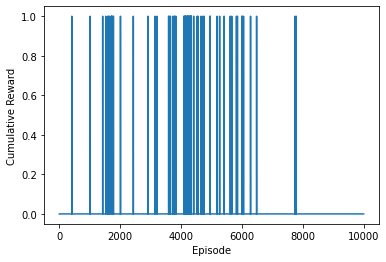

In [4]:
Q, env = train_approximator(stochastic=True, episodes=10000, alpha=0.001, gamma=1)

In [5]:
env.render()

  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [7]:
print_state_values_approximator(env, Q)


		 State Value
------------------------------------------------
 0.0009| 0.0007| 0.0007| 0.0007| 0.0008| 0.0014| 0.0018| 0.0020|
------------------------------------------------
 0.0021| 0.0019| 0.0017| 0.0014| 0.0013| 0.0011| 0.0009| 0.0005|
------------------------------------------------
 0.0002|-0.0003|-0.0007|-0.0012|-0.0017|-0.0021|-0.0025|-0.0028|
------------------------------------------------
-0.0031|-0.0032|-0.0032|-0.0031|-0.0029|-0.0025|-0.0020|-0.0014|
------------------------------------------------
-0.0006| 0.0002| 0.0012| 0.0023| 0.0034| 0.0045| 0.0057| 0.0069|
------------------------------------------------
 0.0080| 0.0095| 0.0115| 0.0132| 0.0146| 0.0157| 0.0166| 0.0189|
------------------------------------------------
 0.0209| 0.0225| 0.0238| 0.0247| 0.0252| 0.0253| 0.0251| 0.0246|
------------------------------------------------
 0.0238| 0.0234| 0.0230| 0.0225| 0.0219| 0.0211| 0.0204| 0.0195|
------------------------------------------------


In [8]:
print_policy_approximator(env, Q)


		 Policy/Actions
------------------------------------------------
  l  |  l  |  l  |  l  |  l  |  n  |  n  |  n  |
------------------------------------------------
  r  |  r  |  s  |  l  |  l  |  l  |  l  |  l  |
------------------------------------------------
  l  |  l  |  l  |  l  |  l  |  l  |  l  |  l  |
------------------------------------------------
  l  |  l  |  l  |  l  |  l  |  l  |  l  |  l  |
------------------------------------------------
  l  |  l  |  l  |  l  |  l  |  l  |  l  |  l  |
------------------------------------------------
  l  |  n  |  n  |  n  |  n  |  n  |  r  |  r  |
------------------------------------------------
  r  |  r  |  r  |  r  |  r  |  r  |  r  |  r  |
------------------------------------------------
  r  |  s  |  s  |  s  |  s  |  s  |  s  |  s  |
------------------------------------------------


### 2.5) Monte Carlo Final Comments

## 3) Q-learning

## 4) SARSA(λ) (Arthur and Maria)

Q-learning has a close relative called SARSA (for State-Action-Reward-State-Action). The update rule for SARSA is:

$Q(s,a) = Q(s,a) + \alpha(R(s) + \gamma Q(s', a') - Q(s,a))$,

where $a'$ is the action actually taken in state $s'$. The rule is applied at the end of each $s, a, r, s', a'$. 

The difference from Q-learning is quite subtle: whereas Q-learning backs up the best Q-values from the state reached in the observed transition, SARSA waits until an action is actually taken and backs up the Q-value for that action. Now, for a greedy agent that always takes the action with best Q-value, the two algorithms are identical. When exploration is happening however, they differ significantly. Because Q-learning uses the best Q-value, it pays no attention to the actual policy being followed - it is an **off-policy** learning algorithm, whereas SARSA is an **on-policy** algorithm. 

The idea in Sarsa($\lambda$) is to apply the TD($\lambda$) prediction method to state-action pairs rather than to states. Obviously, then, we need a trace not just for each state, but for each state-action pair. Let $e_t(s,a)$ denote the trace for state-action pair $s,a$. Otherwise, the method is just TD($\lambda$), substituting state-action variables for estate variables $Q(s,a)$ for $V(s)$ and $e_t(s,a)$ for $e_t(s)$:


$Q_{t+1}(s,a) = Q_t(s,a) + \alpha \delta_t e_t(s,a)$

where

$\delta_t = r_{t+1} + \gamma Q_t(s_{t+1}, a_{t+1}) - Q_t(s_t, a_t)$

There are two methods of $e_t$: accumulate and replace. The first version is:

$e_t(s,a) =
  \begin{cases}
    \gamma \lambda e_{t-1}(s,a) + 1  & \quad \text{if } s=s_t \text{ and } a= a_t\\
    \gamma \lambda e_{t-1}(s,a)      & \quad \text{otherwise}
  \end{cases}
$

The replace method is given by:

$e_t(s,a) =
  \begin{cases}
    1  & \quad \text{if } s=s_t \text{ and } a= a_t\\
    \gamma \lambda e_{t-1}(s,a) & \quad \text{otherwise}
  \end{cases}
$

For this project we have made a tabular and function approximation versions.  

In [2]:
from sarsa_lambda import *
from sarsa_lambda_approx import *

### 4.1) Tabular & Deterministic

The first experiment consisted in applying the SARSA($\lambda$) in the tabular version and deterministic environment. Therefore, we used a grid search techniques to find the best solution given the parameters defined as:

* $\text{episode} \in [1000, 5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01, 0.05, 1.0]$,
* method: accumulate or replace.


In [3]:
report_sarsa(stochastic = False)

/home/marta2/Downloads/mo436-project-1/notebooks/../src/sarsa_lambda.py:82: RuntimeWarning: overflow encountered in double_scalars
  delta = reward + discount*Q[next_state][next_action] - Q[state][action]
/home/marta2/Downloads/mo436-project-1/notebooks/../src/sarsa_lambda.py:88: RuntimeWarning: invalid value encountered in multiply
  Q[s][:] += alpha * delta * E[s][:]


,episodes,gamma,alpha,lambda,epsilon,type,win/loss (%),elapsed time (s)
0,1000,0.99,0.01,0.0,0.01,accumulate,99.0,15.531965
1,1000,0.99,0.01,0.0,0.01,replace,0.0,46.984160
2,1000,0.99,0.01,0.5,0.01,accumulate,100.0,8.389721
3,1000,0.99,0.01,0.5,0.01,replace,99.0,9.319530
4,1000,0.99,0.01,0.9,0.01,accumulate,100.0,20.262969
5,1000,0.99,0.01,0.9,0.01,replace,98.0,6.940933
6,1000,0.99,0.01,1.0,0.01,accumulate,0.0,29.145828
7,1000,0.99,0.01,1.0,0.01,replace,97.0,13.450243
8,1000,0.99,0.01,0.0,0.05,accumulate,92.0,29.343748
9,1000,0.99,0.01,0.0,0.05,replace,0.0,24.052486


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defined as the winning percentage of 100 games played; most executions returned a great $90\%$ win value. We observe that the worst results are with the replaced type and $\lambda$ close to 0.

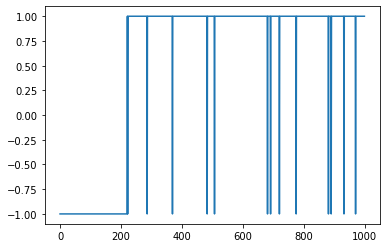

In [5]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
Q_sarsa, E_sarsa, stats, _ = sarsa_lambda(env, 1000, 0.99, 0.01, 0.5, 0.01, 'accumulate')
plt.plot(stats)
plt.show()

The reward is shown between $-1$ to $1$. It is given a positive reward when it reaches the goal, if on the other hand it fell into a hole, then it will have a punishment. This image shows the reward for the 1000 training episodes. We observe that most of them have a positive reward.

In [6]:
generate_stats_sarsa(env, Q_sarsa, E_sarsa, 1, 0.99, 0.01, 0.5, 0.01, 'accumulate', True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFF

1.0

The report of the te best state value and the best policy, as follows:

In [7]:
print_state_values_sarsa(Q_sarsa)


			 State Value
--------------------------------------------------------
  0.36|  0.41| -0.01| -0.02|  0.72|  0.77| -0.00| -0.02|
--------------------------------------------------------
 -0.03|  0.47|  0.53|  0.60|  0.66|  0.81|  0.86| -0.01|
--------------------------------------------------------
 -0.02| -0.01| -0.03|  0.00| -0.01| -0.00|  0.90| -0.01|
--------------------------------------------------------
 -0.04| -0.03| -0.04| -0.03| -0.02|  0.00|  0.95|  0.04|
--------------------------------------------------------
 -0.03| -0.03| -0.03|  0.00| -0.01| -0.01|  0.98|  1.00|
--------------------------------------------------------
 -0.03|  0.00|  0.00|  0.00| -0.00| -0.00|  0.00|  1.02|
--------------------------------------------------------
 -0.01|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|  1.04|
--------------------------------------------------------
 -0.01|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|  0.00|
--------------------------------------------------------


In [8]:
print_policy_sarsa(Q_sarsa)


		 Policy/Actions
------------------------------------------------
  →  |  ↓  |  ←  |  ←  |  →  |  ↓  |  ←  |  ←  |
------------------------------------------------
  ↓  |  →  |  →  |  →  |  ↑  |  →  |  ↓  |  ←  |
------------------------------------------------
  →  |  ↑  |  ←  |  ←  |  →  |  →  |  ↓  |  ↓  |
------------------------------------------------
  ↑  |  ↑  |  ←  |  →  |  ↓  |  ←  |  ↓  |  ↓  |
------------------------------------------------
  ↑  |  ←  |  ←  |  ←  |  →  |  ↓  |  →  |  ↓  |
------------------------------------------------
  ↓  |  ←  |  ←  |  ↓  |  →  |  ↑  |  ←  |  ↓  |
------------------------------------------------
  ↑  |  ←  |  ←  |  ←  |  ←  |  →  |  ←  |  ↓  |
------------------------------------------------
  →  |  ↓  |  ←  |  ←  |  ↓  |  ↓  |  ←  |  ←  |
------------------------------------------------


It is observed that the most productive path is to go all the way to the right and then go down. And we observe in most of the ways it is to go one of the edges and then go to the right and down.

### 4.2) Tabular & Stochastic

The first experiment consisted in applying the SARSA($\lambda$) in the tabular version and deterministic environment. Therefore, we used a grid search techniques to find the best solution given the parameters defined as:

* $\text{episode} \in [1000, 5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01, 0.05, 1.0]$,
* method: accumulate or replace.

In [4]:
report_sarsa(stochastic = True)

,episodes,gamma,alpha,lambda,epsilon,type,win/loss (%),elapsed time (s)
0,1000,0.99,0.01,0.01,0.01,accumulate,32.0,35.823933
1,1000,0.99,0.01,0.01,0.01,replace,0.0,22.258200
2,1000,0.99,0.01,0.50,0.01,accumulate,64.0,36.563314
3,1000,0.99,0.01,0.50,0.01,replace,8.0,28.171000
4,1000,0.99,0.01,0.90,0.01,accumulate,58.0,28.701306
5,1000,0.99,0.01,0.90,0.01,replace,35.0,28.099315
6,1000,0.99,0.01,1.00,0.01,accumulate,0.0,13.269087
7,1000,0.99,0.01,1.00,0.01,replace,43.0,31.653745
8,1000,0.99,0.01,0.01,0.05,accumulate,19.0,37.123757
9,1000,0.99,0.01,0.01,0.05,replace,0.0,18.582086


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defines as the percentage of wins from 100 games plays; the majority of wins is $78.0\%$, with this parameters:

* $\text{episode} \in [5000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.50]$,
* $\epsilon \in [0.05]$,
* method: accumulate

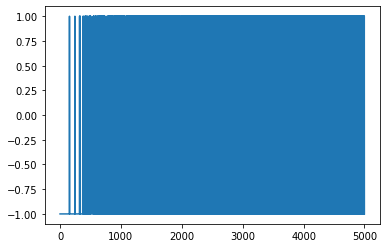

In [9]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
Q_ssarsa, E_ssarsa, stats, _ = sarsa_lambda(env, 5000, 0.99, 0.01, 0.5, 0.05, 'accumulate')
plt.plot(stats)
plt.show()

The reward is shown between $-1$ to $1$. It is given a positive reward when it reaches the goal, if on the other hand it fell into a hole, then it will have a punishment. This image shows the reward for the 5000 training episodes. We observe that most of them have a positive reward.

The report of the te best state value and the best policy, as follows:

In [10]:
generate_stats_sarsa(env, Q_ssarsa, E_ssarsa, 1, 0.99, 0.01, 0.5, 0.05, 'accumulate', True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
F

1.0

In [11]:
print_state_values_sarsa(Q_ssarsa)


			 State Value
--------------------------------------------------------
  0.03|  0.03|  0.06|  0.08|  0.11|  0.14|  0.21|  0.24|
--------------------------------------------------------
  0.03|  0.03|  0.04|  0.06|  0.09|  0.14|  0.20|  0.25|
--------------------------------------------------------
 -0.03| -0.04| -0.08|  0.00| -0.05|  0.07|  0.16|  0.28|
--------------------------------------------------------
 -0.09| -0.12| -0.22| -0.43| -0.26|  0.00|  0.21|  0.32|
--------------------------------------------------------
 -0.13| -0.23| -0.37|  0.00| -0.22| -0.09|  0.17|  0.40|
--------------------------------------------------------
 -0.14|  0.00|  0.00| -0.14| -0.21| -0.20|  0.00|  0.56|
--------------------------------------------------------
 -0.11|  0.00| -0.05| -0.04|  0.00| -0.12|  0.00|  0.78|
--------------------------------------------------------
 -0.07| -0.09| -0.07|  0.00| -0.02| -0.02|  0.00|  0.00|
--------------------------------------------------------


In [12]:
print_policy_sarsa(Q_ssarsa)


		 Policy/Actions
------------------------------------------------
  →  |  ↓  |  →  |  →  |  ↑  |  ↓  |  →  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ↑  |  ↑  |  ↑  |  →  |  ↑  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ←  |  ←  |  →  |  ↑  |  ↓  |  →  |
------------------------------------------------
  ↑  |  ↑  |  ↑  |  ↑  |  ←  |  ←  |  →  |  →  |
------------------------------------------------
  ←  |  ↑  |  →  |  ←  |  →  |  ↓  |  ↑  |  →  |
------------------------------------------------
  ←  |  ←  |  ←  |  →  |  ↓  |  ←  |  ←  |  →  |
------------------------------------------------
  →  |  ←  |  ←  |  ↑  |  ←  |  ←  |  ←  |  →  |
------------------------------------------------
  ←  |  ↑  |  ↓  |  ←  |  →  |  →  |  →  |  ←  |
------------------------------------------------


### 4.3) Linear Function Approximation & Deterministic


A binary discretization of the current state was performed and through the action the state for that action is chosen. So it was tested:
    
* $\text{episode} \in [15000, 20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.001, 0.01, 0.1]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01]$.

In [3]:
report_sarsa_approx(False)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,15000.0,0.99,0.001,0.01,0.01,98.0,33.800815
1,15000.0,0.99,0.001,0.50,0.01,98.0,32.709157
2,15000.0,0.99,0.001,0.90,0.01,100.0,32.868252
3,15000.0,0.99,0.001,1.00,0.01,98.0,30.832365
4,20000.0,0.99,0.001,0.01,0.01,99.0,42.008074
5,20000.0,0.99,0.001,0.50,0.01,98.0,39.952675
6,20000.0,0.99,0.001,0.90,0.01,97.0,40.748318
7,20000.0,0.99,0.001,1.00,0.01,99.0,40.821783
8,15000.0,0.99,0.010,0.01,0.01,96.0,33.965552
9,15000.0,0.99,0.010,0.50,0.01,98.0,35.815818


It is observed that it has greater loss when the learning rate ($\alpha$) is at $0.1$. On the other hand, we have quite a bit of convergence when $\alpha$ is very small.

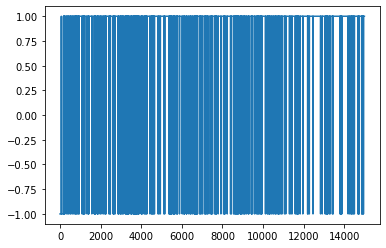

In [5]:
env = gym.make('FrozenLake8x8-v1', is_slippery=False)
w_dlfsarsa, stats = sarsa_lambda_approx(env, 15000, 0.99, 0.001, 0.9, 0.01)
plt.plot(stats)
plt.show()

In [6]:
generate_stats_sarsa_approx(env, w_dlfsarsa, 1, 0.99, 0.001, 0.9, 0.01, True)

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFF

1.0

In [80]:
def draw_feature_sarsa_lambda_approx(env, w):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8,8))

    # Make data.
    X = np.arange(0, 8, 1)
    Y = np.arange(0, 8, 1)
    X, Y = np.meshgrid(X, Y)

    states = np.arange(0, 64, 1)

    for a in range(4):
        Z = np.array([linear_regression(feature_function(env, s, a), w)
                      for s in states])
        Z = Z.reshape(8, 8)

        # Plot the surface.
        ax.plot_surface(X, Y, Z, alpha=0.5, linewidth=0.2, antialiased=True)
        ax.azim = -45
        ax.dist = 10
        ax.elev = 20
        ax.set_xlabel("X")
        ax.set_ylabel("Y")

    plt.figure()
    plt.show()


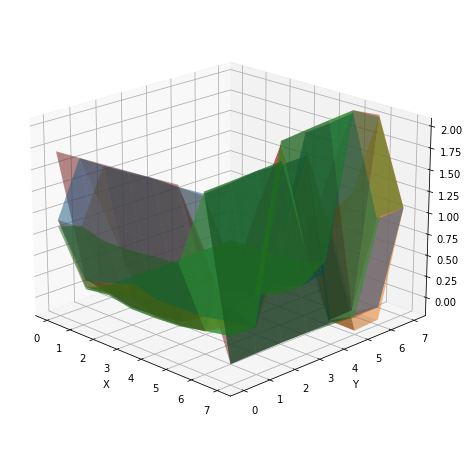

<Figure size 432x288 with 0 Axes>

In [81]:
draw_feature_sarsa_lambda_approx(env, w_dlfsarsa)

### 4.4) Linear Function Approximation & Stochastic


A binary discretization of the current state was performed and through the action the state for that action is chosen. So it was tested:
    
* $\text{episode} \in [15000, 20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.001, 0.01, 0.1]$,
* $\lambda \in [0.01, 0.5, 0.9, 1.0]$,
* $\epsilon \in [0.01]$.


In [4]:
report_sarsa_approx(True)

,episodes,gamma,alpha,lambda,epsilon,win/loss (%),elapsed time (s)
0,15000.0,0.99,0.001,0.01,0.01,54.0,270.128492
1,15000.0,0.99,0.001,0.50,0.01,83.0,218.299809
2,15000.0,0.99,0.001,0.90,0.01,69.0,226.250795
3,15000.0,0.99,0.001,1.00,0.01,79.0,186.460935
4,20000.0,0.99,0.001,0.01,0.01,48.0,344.313794
5,20000.0,0.99,0.001,0.50,0.01,81.0,300.322588
6,20000.0,0.99,0.001,0.90,0.01,75.0,313.826838
7,20000.0,0.99,0.001,1.00,0.01,74.0,263.719175
8,15000.0,0.99,0.010,0.01,0.01,76.0,177.484497
9,15000.0,0.99,0.010,0.50,0.01,83.0,222.260945


In this experiment, we vary $\lambda$, $\epsilon$, episode, and method type. The win/loss metric is defines as the percentage of wins from 100 games plays; the majority of wins is $85.0\%$, with this parameters:

* $\text{episode} \in [20000]$,
* $\gamma \in [0.99]$,
* $\alpha \in [0.01]$,
* $\lambda \in [0.50]$,
* $\epsilon \in [0.01]$.

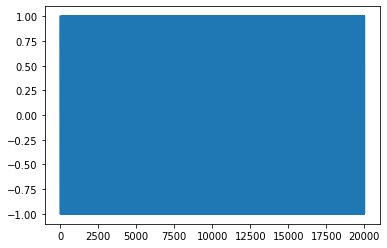

In [8]:
env = gym.make('FrozenLake8x8-v1', is_slippery=True)
w_slfsarsa, stats = sarsa_lambda_approx(env, 20000, 0.99, 0.010, 0.50, 0.01)
plt.plot(stats)
plt.show()

In [82]:
generate_stats_sarsa_approx(env, w_slfsarsa, 1, 0.99, 0.010, 0.50, 0.01, True)

  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
F

1.0

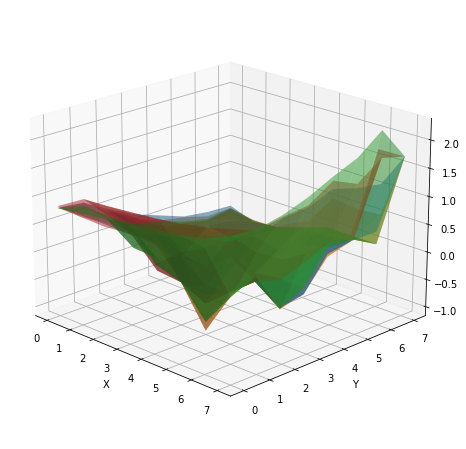

<Figure size 432x288 with 0 Axes>

In [83]:
draw_feature_sarsa_lambda_approx(env, w_slfsarsa)